<a href="https://colab.research.google.com/github/BAravind-5/Task_13/blob/main/Task13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data        # flattened images (64 features)
y = digits.target     # digit labels (0–9)

X.shape, y.shape

((1797, 64), (1797,))

The digits dataset contains 8×8 images flattened into 64 numerical features.

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

PCA is variance-based, so scaling ensures all features contribute equally.

In [3]:
from sklearn.decomposition import PCA

components = [2, 10, 30, 50]
explained_variance = {}

for n in components:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance[n] = np.sum(pca.explained_variance_ratio_)

explained_variance

{2: np.float64(0.21594970500832789),
 10: np.float64(0.5887375533730296),
 30: np.float64(0.8932084382449569),
 50: np.float64(0.982759194602153)}

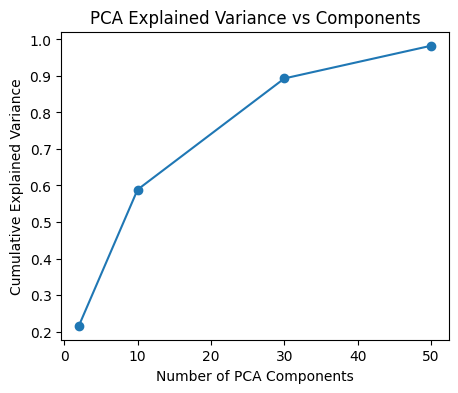

In [4]:
plt.figure(figsize=(5,4))
plt.plot(list(explained_variance.keys()),
         list(explained_variance.values()),
         marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance vs Components")
plt.show()

Most variance is retained with far fewer components than the original 64.

In [5]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(1797, 30)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
acc_original = accuracy_score(y_test, y_pred)

acc_original

0.9722222222222222

In [8]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = lr_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)

acc_pca

0.9527777777777777

In [9]:
acc_original, acc_pca

(0.9722222222222222, 0.9527777777777777)

PCA significantly reduces dimensionality while maintaining
comparable classification accuracy.

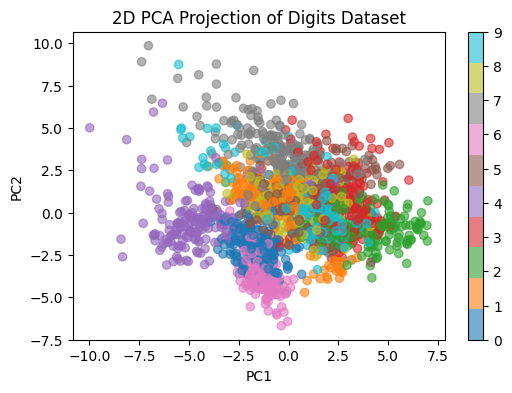

In [10]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
scatter = plt.scatter(
    X_2d[:,0], X_2d[:,1],
    c=y, cmap='tab10', alpha=0.6
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Projection of Digits Dataset")
plt.colorbar(scatter)
plt.show()

Some digit classes show partial separation in lower-dimensional space.